# Neccessary Installations and Imports

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import os
import pandas as pd
import cv2
from PIL import Image
import torch
from ultralytics import YOLO
from google.colab import output
from IPython import display
import zipfile
from IPython.display import Image as IPImage, display

# GPU Setup

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name())
else:
    device = torch.device("cpu")
    print('Using CPU')

Using GPU: Tesla T4


# Training
Skip this part if you already have a trained model. The trained model will be saved in the /content/runs/detect/train2/weights

**File setup:**
Yolo needs a parallel directory called datasets consisting of subdirectories: train, valid and test, each of which have a subdirectories images and labels. These can downloaded from roboflow and uploaded as a zip file, which will be then processed by the following script. Also make sure to upload your yaml file separately. So upload:

1.   datasets.zip containing 3 directories test, train, valid with images labels subdirectories each and the yaml file
2.   Separately uploaded yaml file


In [4]:
with zipfile.ZipFile("datasets.zip", 'r') as zip_ref:
    zip_ref.extractall()

Here the actual training takes place

In [14]:
#load the pretrained model
model = YOLO("yolov8s.pt")
model.to(device)
#train and save the model
# consider selecting single_cls=True
model.train(data="data.yaml", epochs=20)
model.export(format="onnx") # export the model you have trained

engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

train: Scanning /content/datasets/train/labels.cache... 946 images, 1 backgrounds, 0 corrupt: 100%|██████████| 946/946 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/valid/labels.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.85G      1.824      2.738      1.564          6        640: 100%|██████████| 60/60 [00:25<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         71        209      0.468      0.462      0.424      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.68G      1.812      1.822      1.593         18        640: 100%|██████████| 60/60 [00:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         71        209      0.439      0.354      0.276      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.68G      1.872      1.914      1.633          3        640: 100%|██████████| 60/60 [00:22<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         71        209      0.247      0.416      0.227      0.097



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.53G      1.858      1.778      1.606          4        640: 100%|██████████| 60/60 [00:22<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         71        209      0.469      0.483       0.45      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.58G      1.831      1.709      1.584         11        640: 100%|██████████| 60/60 [00:23<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]


                   all         71        209      0.512      0.478       0.46      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.54G      1.745      1.586      1.517         10        640: 100%|██████████| 60/60 [00:22<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         71        209      0.733      0.473      0.613       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.59G      1.775      1.627      1.546          5        640: 100%|██████████| 60/60 [00:22<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         71        209      0.616      0.584       0.62      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.53G      1.682      1.489       1.48         13        640: 100%|██████████| 60/60 [00:21<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         71        209      0.652      0.654      0.691      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.53G      1.657      1.452      1.454          6        640: 100%|██████████| 60/60 [00:22<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         71        209      0.611      0.622      0.646      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.42G      1.667      1.458      1.456          8        640: 100%|██████████| 60/60 [00:22<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         71        209      0.675      0.684      0.709      0.403


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.37G      1.671      1.479      1.471          4        640: 100%|██████████| 60/60 [00:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         71        209      0.735      0.689      0.754      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.36G      1.597      1.387      1.424          2        640: 100%|██████████| 60/60 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         71        209      0.731      0.663      0.755      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.39G      1.608       1.37      1.454          3        640: 100%|██████████| 60/60 [00:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         71        209      0.715       0.67       0.75       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.39G       1.55      1.283      1.391          3        640: 100%|██████████| 60/60 [00:21<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         71        209      0.783      0.732      0.802      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.36G      1.505      1.221      1.365          2        640: 100%|██████████| 60/60 [00:21<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         71        209      0.801      0.746      0.836      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.39G      1.498      1.234      1.362          2        640: 100%|██████████| 60/60 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         71        209      0.834      0.699      0.826      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.47G      1.468      1.149       1.37          2        640: 100%|██████████| 60/60 [00:20<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         71        209      0.865       0.77      0.879      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.39G      1.409      1.081      1.318          2        640: 100%|██████████| 60/60 [00:21<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         71        209      0.899      0.767      0.884      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.39G      1.394      1.017      1.292          4        640: 100%|██████████| 60/60 [00:21<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         71        209      0.818      0.833      0.905      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.39G      1.378     0.9901      1.272          3        640: 100%|██████████| 60/60 [00:21<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         71        209      0.796      0.842      0.903      0.617



20 epochs completed in 0.138 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]


                   all         71        209      0.817      0.833      0.904      0.624
Speed: 1.3ms preprocess, 4.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train4
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 1.2s, saved as 'runs/detect/train4/weights/best.onnx' (42.6 MB)

Export complete (1.5s)
Results saved to /content/runs/detect/train4/weights
Predict:         yolo predict task=detect model=runs/detect/train4/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train4/weights/best.onnx imgsz=640 data=data.yaml  
Visualize:       https://netron.app


'runs/detect/train4/weights/best.onnx'

# Single Image Testing

Upload the image to run the model on and fill in the path to the image

In [ ]:
#PARAMS preferably save them in the main directory on colab
pt_file = "\best.pt"
image = 'pothole_69_png.rf.b7d93ad3f878bcc1db21c1232e03ef82.jpg'
min_confidence = 0.6

#Test
model=YOLO(pt_file)
model.to(device)
result = model(source=image,save=True,save_txt=True,save_conf=True,conf=min_confidence)

FileNotFoundError: [Errno 2] No such file or directory: '\x08est.pt'

Copy the results path from the output of the previous cell into path1 variable

   class  x_center  y_center    width    height  confidence
0      1  0.676438  0.819149  0.15798  0.067261    0.757343


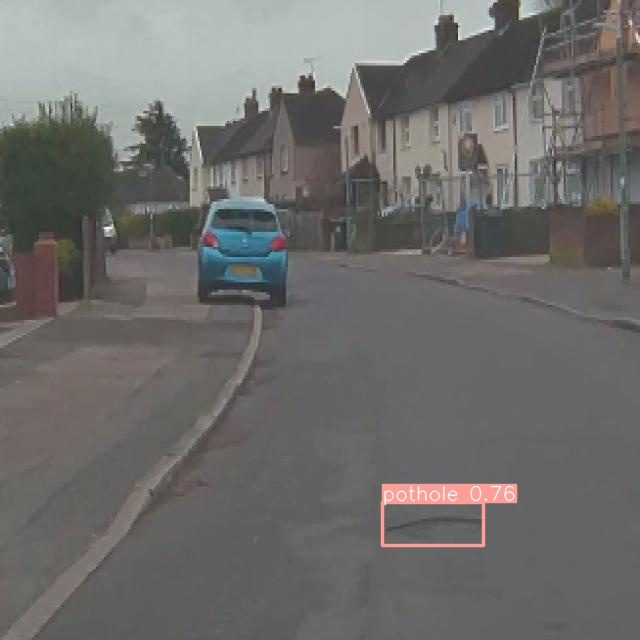

In [ ]:
#IMPORTANT copy the results path from the output of the previous cell
path1 = "runs/detect/predict3"

#print the data of detected objects
path2 = "labels"
directory = os.path.join(path1, path2)
if len(os.listdir(directory)) == 0:
    print("No Potholes and no cracks detected")
else:
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            if filename.lower().endswith('.txt'):
                headers = ["class","x_center","y_center","width","height","confidence"]
                df = pd.read_csv(file_path, delim_whitespace=True, names=headers)
                print("The following potholes and cracks were detected:")
                print(df)
                break

#displaying the output image
for filename in os.listdir(path1):
    file_path = os.path.join(path1, filename)
    if os.path.isfile(file_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            display(IPImage(filename=file_path))    #neccessary for colab, replace with PIL or cv2 display in local environments

# Testset Testing

Upload testset.zip containing the test image. Make sure that your test images that contain potholes or cracks have names starting with "p".



In [25]:
with zipfile.ZipFile("testset.zip", 'r') as zip_ref:
    zip_ref.extractall()

Running the model on testset images

In [26]:
#Params
test_path = "/content/testset"
pt_file = "/content/runs/detect/train/weights/best.pt"
min_confidence = 0.1

#Preparing test images
test_images = []
num_pothole_images = 0
num_clean_images = 0
for filename in os.listdir(test_path):
    file_path = os.path.join(test_path, filename)
    test_images.append(file_path)
    if filename.startswith('p'):
        num_pothole_images = num_pothole_images + 1
    else:
        num_clean_images = num_clean_images + 1

#Test
model=YOLO(pt_file)
model.to(device)
result = model(source=test_images,save=True,save_txt=True,save_conf=True,conf=min_confidence)


0: 640x640 1 pothole, 10.0ms
1: 640x640 1 pothole, 10.0ms
2: 640x640 (no detections), 10.0ms
3: 640x640 (no detections), 10.0ms
4: 640x640 3 potholes, 10.0ms
5: 640x640 3 potholes, 10.0ms
6: 640x640 4 potholes, 10.0ms
7: 640x640 (no detections), 10.0ms
8: 640x640 (no detections), 10.0ms
9: 640x640 2 potholes, 10.0ms
10: 640x640 1 pothole, 10.0ms
11: 640x640 (no detections), 10.0ms
12: 640x640 3 potholes, 10.0ms
13: 640x640 1 pothole, 10.0ms
14: 640x640 (no detections), 10.0ms
15: 640x640 (no detections), 10.0ms
16: 640x640 (no detections), 10.0ms
17: 640x640 (no detections), 10.0ms
18: 640x640 4 potholes, 10.0ms
19: 640x640 3 potholes, 10.0ms
20: 640x640 (no detections), 10.0ms
21: 640x640 3 potholes, 10.0ms
22: 640x640 (no detections), 10.0ms
23: 640x640 3 potholes, 10.0ms
24: 640x640 (no detections), 10.0ms
25: 640x640 (no detections), 10.0ms
26: 640x640 4 potholes, 10.0ms
27: 640x640 2 potholes, 10.0ms
28: 640x640 5 potholes, 10.0ms
29: 640x640 9 potholes, 10.0ms
30: 640x640 1 poth

Copy the results path from the output of the previous cell into path1 variable

In [27]:
#IMPORTANT copy the results path from the output of the previous cell
path1 = "runs/detect/predict"

true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0
detected = []
#get the data of detected objects
path2 = "labels"
directory = os.path.join(path1, path2)
if len(os.listdir(directory)) == 0:
    print("No Potholes and no cracks detected across the whole dataset")
else:
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            if filename.lower().endswith('.txt'):
                if filename.startswith('p'):
                    true_positives = true_positives + 1
                    detected.append(filename)
                else:
                    false_positives = false_positives + 1
    #calculate the classification categories
    false_negatives = num_pothole_images - true_positives
    true_negatives = num_clean_images - false_positives
    print("True positives: " + str(true_positives))
    print("True negatives: " + str(true_negatives))
    print("False positives: " + str(false_positives))
    print("False negatives: " + str(false_negatives))
    #calculate the metrics
    accuracy = (true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
    precision = (true_positives)/(true_positives+false_positives)
    recall = (true_positives)/(true_positives+false_negatives)
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))

True positives: 136
True negatives: 127
False positives: 13
False negatives: 13
Accuracy: 0.9100346020761245
Precision: 0.912751677852349
Recall: 0.912751677852349
